<a href="https://colab.research.google.com/github/danlabset/ML/blob/main/Housing_Price_Prediction_ML_Project_DW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing** the **dependecies** **bold text**

In [153]:
import numpy as np

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

importing Boston Housing price dataset

In [155]:
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [156]:
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

The X- predicator

In [157]:
house_price_dataset.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [158]:
house_price_dataset.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

 the target varible MedHouseVal

In [159]:
house_price_dataset.target_names

['MedHouseVal']

Lest conver this to Data Frames

In [160]:
house_price_dataset_df = pd.DataFrame(house_price_dataset.data,columns=house_price_dataset.feature_names) #load dataset into dataframe

In [161]:
house_price_dataset_df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [162]:
house_price_dataset_df['price_y'] = house_price_dataset.target

In [163]:
house_price_dataset_df.drop_duplicates(inplace=True) ##duplicate
house_price_dataset_df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price_y       0
dtype: int64

In [164]:
house_price_dataset_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price_y
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [165]:
house_price_dataset_df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price_y
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


The columns and rows of our data

In [166]:
house_price_dataset_df.shape

(20640, 9)

Data Check? Fairley clean data. STD,MEAN

In [167]:
house_price_dataset_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price_y
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Let me understand the correlation betwwen features
- Postive Correlation
- Negative Correlation

In [168]:
correlation = house_price_dataset_df.corr()

HEATMAP IS your goto - easy go .. you can also simpley plot using sns.heatmap(correlation)

<Axes: >

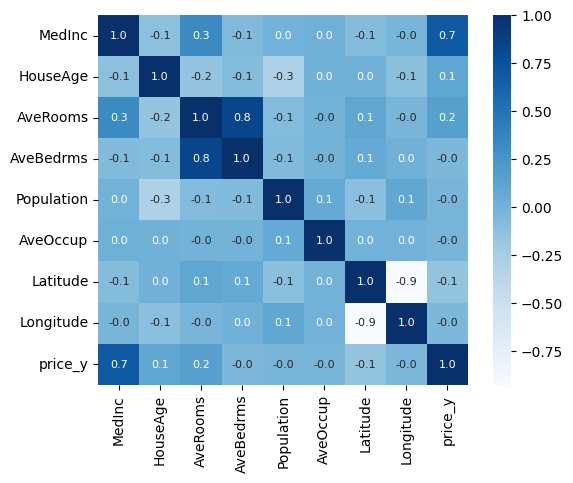

In [169]:
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

Splittig the data into training and test

In [170]:
X =  house_price_dataset_df.drop(['price_y'],axis=1) #drop price column and keep the rest becuase its target varible
Y = house_price_dataset_df['price_y'] #take only price as Y target

In [190]:
print(X.shape)
print(Y.shape)

(20640, 8)
(20640,)


Split to X_Train,Y_Train

In [193]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [194]:
# Displaying the results
print("X_train:")
print(X_train.shape)
print("Y_train:")
print(Y_train.shape)
print("X_test:")
print(X_test.shape)
print("Y_test:")
print(Y_test.shape)

X_train:
(16512, 8)
Y_train:
(16512,)
X_test:
(4128, 8)
Y_test:
(4128,)


MODEL training XGBOOST model training - mix of models for small datset

In [195]:
model = XGBRegressor()

In [196]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

EVAULUATION of the MODEL

Prediction using the model

In [197]:
training_data_prediction = model.predict(X_train)

In [198]:
print(training_data_prediction)

[1.2811276 3.5806673 1.795477  ... 2.308142  2.5287933 3.645046 ]


Let EVALUATE using RSQURE AND MSE

In [199]:
score_1 = metrics.r2_score(Y_train,training_data_prediction)

In [200]:
print("Estimated R-SQAURED ERROR:",score_1)

Estimated R-SQAURED ERROR: 0.9445725845802867


In [202]:
score_2  = metrics.mean_squared_error(Y_train,training_data_prediction)
print("Estimated MSE RROR:",score_2)

Estimated MSE RROR: 0.07409416126887404


In [207]:
Y_train

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
         ...  
11284    2.292
11964    0.978
5390     2.221
860      2.835
15795    3.250
Name: price_y, Length: 16512, dtype: float64

In [211]:
mean_squared = Y_train.mean() ** 2 # to check the mean of the traget varible is greater than the MSE
print("Square of the mean:", mean_squared) # if the MSE is smaller than the Square MEAN then its very good value

Square of the mean: 4.292964111313704


"The model's performance is better than a mean-based prediction."

Lets predicit on test data now

In [214]:
test_data = model.fit(X_test,Y_test)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [216]:
test_data_prediciton = model.predict(X_test)

In [217]:
score_1 = metrics.r2_score(Y_test,test_data_prediciton)

In [218]:
print("Estimated R-SQAURED ERROR:",score_1)

Estimated R-SQAURED ERROR: 0.9854349555648584


In [219]:
score_1 = metrics.mean_squared_error(Y_test,test_data_prediciton)
print("Estimated MSE ERROR:",score_1)

Estimated MSE ERROR: 0.019086164996287205


In [220]:
mean_squared = Y_train.mean() ** 2 # to check the mean of the traget varible is greater than the MSE
print("Square of the mean:", mean_squared) # if the MSE is smaller than the Square MEAN then its very good value

Square of the mean: 4.292964111313704


Visulising the actual price and predicted preice on scatter plot :

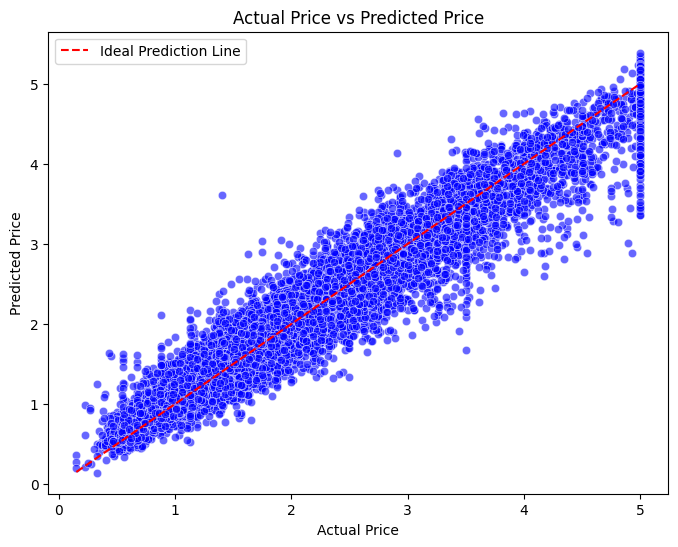

In [223]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_train, y=training_data_prediction, color='blue', alpha=0.6)
sns.lineplot(x=Y_train, y=Y_train, color='red', linestyle='--', label='Ideal Prediction Line')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.legend()
plt.show()

Linear Regression Model

In [225]:
#THE Linera regr
from sklearn.linear_model import LinearRegression

In [226]:
model = LinearRegression()

In [229]:
model.fit(X_train,Y_train)

LinearRegression()

In [231]:
traing_regression_data = model.predict(X_train)

In [233]:
score_1 = metrics.mean_squared_error(Y_train,traing_regression_data)
print("Estimated MSE ERROR:",score_1)

Estimated MSE ERROR: 0.5179331255246699


In [234]:
test_regression_data = model.predict(X_test)

In [235]:
score_1 = metrics.mean_squared_error(Y_test,test_regression_data)
print("Estimated MSE ERROR:",score_1)

Estimated MSE ERROR: 0.5558915986952444


POOR MSE FOR Linear Regressor so let try random forest

In [236]:
from sklearn.ensemble import RandomForestRegressor

In [237]:
model = RandomForestRegressor() #overfitting this case traing result is higer and test is lower so use next line

In [272]:
model = RandomForestRegressor(n_estimators=100, max_depth=10) # adjusting paramters- hyperparamterization


In [275]:
model.fit(X_train,Y_train)

RandomForestRegressor(max_depth=10)

In [276]:
training_data_randomforest = model.predict(X_train)

In [277]:
score_1 = metrics.mean_squared_error(Y_train,traing_regression_data)
print("Estimated MSE ERROR:",score_1)

Estimated MSE ERROR: 0.5179331255246699


In [278]:
test_regression_randomforest_data = model.predict(X_test)

In [279]:
score_1 = metrics.mean_squared_error(Y_test,test_regression_randomforest_data)
print("Estimated MSE ERROR:",score_1)

Estimated MSE ERROR: 0.2961229147465314


Still over fitting ? after depth and max adjustement ?

In [268]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, Y, scoring='neg_mean_squared_error', cv=5)
cv_mse = -cv_scores.mean()

print("Cross-Validation MSE:", cv_mse)

Cross-Validation MSE: 0.5596452341999797
